In [1]:
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt

etc = pd.read_csv('youtube_trot3.csv',encoding='utf-8')


In [2]:
len(etc)

676

In [3]:
etc.head(3)

,Unnamed: 0,ID,Comment
0,0,안주희,자막이음의높낮이로결정되네ㅋㅋㅋ
1,1,chanbaek6104,I'mnotevenkoreanandidon'tundrestanditbutireall...
2,2,호랭이탈,오오오기아의헤즐베이커오오오기아의헤즐베이커~승리를위하여기아헤즐베이커기아의헤즐베이커~


In [4]:
etc2=list(etc.Comment)
etc2[0:2]

['자막이음의높낮이로결정되네ㅋㅋㅋ',
 "I'mnotevenkoreanandidon'tundrestanditbutireallylovethissong."]

In [5]:
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in etc2:
    clean = strip_punctuation(sent)
    clean_title.append(clean)
    
clean_title[0:1]

['자막이음의높낮이로결정되네ㅋㅋㅋ']

In [6]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

In [7]:
import time
import datetime
start = time.time()

In [8]:
dataset = []
for i in range(len(clean_title)):
    dataset.append(twitter_tag.nouns(re.sub('[^가-힣a-zA-Z\s]','',clean_title[i])))


sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times=times[0]
print(times)

0:06:44


In [9]:
from gensim import corpora, models 
import gensim

In [10]:
high_score_reviews = dataset

In [11]:
high_score_reviews = [[y for y in x if not len(y)==1]
                       for x in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus=[dictionary.doc2bow(text) for text in high_score_reviews]

In [12]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = gensim.models.LdaModel(corpus,num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=high_score_reviews,dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

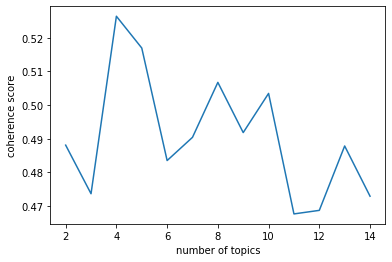

In [13]:
x = range(2,15)
plt.plot(x,coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

In [14]:
import matplotlib.pyplot as plt
perplexity_values=[]
for i in range(2,20):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

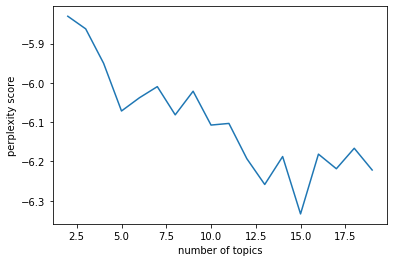

In [15]:
x=range(2,20)
plt.plot(x,perplexity_values)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

In [16]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4,alpha=0.2,id2word = dictionary)

In [17]:
ldamodel.print_topics(num_words=20)

[(0,
  '0.036*"트로트" + 0.031*"배터리" + 0.030*"노래" + 0.030*"사랑" + 0.022*"베이커" + 0.022*"기아" + 0.022*"당신" + 0.017*"헤즐" + 0.015*"지금" + 0.014*"홍진영" + 0.013*"오늘" + 0.013*"정말" + 0.012*"하루" + 0.012*"오오오" + 0.010*"사람" + 0.008*"화이팅" + 0.008*"시간" + 0.007*"학교" + 0.006*"진짜" + 0.006*"진영"'),
 (1,
  '0.122*"사랑" + 0.078*"당신" + 0.065*"배터리" + 0.038*"노래" + 0.021*"정말" + 0.016*"하나" + 0.015*"홍진영" + 0.013*"완전" + 0.013*"전부" + 0.012*"내사" + 0.011*"진짜" + 0.009*"가슴" + 0.009*"요나" + 0.008*"이아" + 0.008*"의약" + 0.008*"다사" + 0.006*"지금" + 0.006*"할머니" + 0.006*"듣기" + 0.005*"데리"'),
 (2,
  '0.035*"노래" + 0.026*"배터리" + 0.020*"치킨" + 0.015*"초딩" + 0.012*"요즘" + 0.011*"중독" + 0.011*"진영" + 0.007*"홍진영" + 0.007*"정말" + 0.007*"지금" + 0.007*"박동원" + 0.007*"조상우" + 0.007*"오빠" + 0.007*"추억" + 0.005*"트로트" + 0.005*"진짜" + 0.005*"못살" + 0.005*"노래방" + 0.005*"그때" + 0.005*"느낌"'),
 (3,
  '0.086*"당신" + 0.076*"노래" + 0.062*"홍진영" + 0.040*"사랑" + 0.020*"배터리" + 0.016*"완전" + 0.010*"내사" + 0.010*"전부" + 0.009*"초딩" + 0.009*"최고" + 0.009*"정말" + 0.009*"하나" + 0.008*"대박" +

In [18]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,corpus,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.100976  0.026650       1        1  45.615574
0     -0.030556 -0.118177       2        1  22.382250
3      0.066470  0.030621       3        1  19.198189
2     -0.136890  0.060906       4        1  12.803984, topic_info=    Term        Freq       Total Category  logprob  loglift
283   당신  126.000000  126.000000  Default  30.0000  30.0000
12   홍진영   50.000000   50.000000  Default  29.0000  29.0000
20    노래   95.000000   95.000000  Default  28.0000  28.0000
37    사랑  155.000000  155.000000  Default  27.0000  27.0000
11   트로트   22.000000   22.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
29    지금    1.969779   17.446556   Topic4  -4.9697  -0.1258
35    정말    1.973405   33.441624   Topic4  -4.9678  -0.7746
12   홍진영    2.052386   50.507736   Topic4  -4.9286  -1.1477
11   트로트    1.381421   22.209702   Topic4  -5.3245  -0.7220
15    진짜    1.370135   16.339405   Topic4  -5.3327  -0.4233

[247 rows x 6 columns], token_table=      Topic      Freq Term
term                      
386       1  0.590712   가득
386       2  0.147678   가득
386       3  0.295356   가득
76        2  0.234015   가사
76        3  0.234015   가사
...     ...       ...  ...
12        4  0.039598  홍진영
100       2  0.776134  화이팅
100       3  0.194033  화이팅
374       4  0.758084   흥행
379       3  0.572420  히히히

[307 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])